<a href="https://colab.research.google.com/github/entenam/TF-Intro/blob/main/Horse_v_HumanTrLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Click the button on top that says, `Open in Colab`, to run this notebook as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)### YOUR CODE HERE

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  ### YOUR CODE HERE
  layer.trainable = False

# Print the model summary
pre_trained_model.summary()

# Expected Output is extremely large, but should end with:

#batch_normalization_v1_281 (Bat (None, 3, 3, 192)    576         conv2d_281[0][0]                 
#__________________________________________________________________________________________________
#activation_273 (Activation)     (None, 3, 3, 320)    0           batch_normalization_v1_273[0][0] 
#__________________________________________________________________________________________________
#mixed9_1 (Concatenate)          (None, 3, 3, 768)    0           activation_275[0][0]             
#                                                                 activation_276[0][0]             
#__________________________________________________________________________________________________
#concatenate_5 (Concatenate)     (None, 3, 3, 768)    0           activation_279[0][0]             
#                                                                 activation_280[0][0]             
#__________________________________________________________________________________________________
#activation_281 (Activation)     (None, 3, 3, 192)    0           batch_normalization_v1_281[0][0] 
#__________________________________________________________________________________________________
#mixed10 (Concatenate)           (None, 3, 3, 2048)   0           activation_273[0][0]             
#                                                                 mixed9_1[0][0]                   
#                                                                 concatenate_5[0][0]              
#                                                                 activation_281[0][0]             
#==================================================================================================
#Total params: 21,802,784
#Trainable params: 0
#Non-trainable params: 21,802,784

In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output# Your Code Here

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [17]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.997):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation = 'sigmoid')(x)### YOUR CODE HERE)(x)           

model = Model(pre_trained_model.input, x) ### YOUR CODE HERE, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy',  
              metrics = ['accuracy'])

model.summary()

# Expected output will be large. Last few lines should be:

# mixed7 (Concatenate)            (None, 7, 7, 768)    0           activation_248[0][0]             
#                                                                  activation_251[0][0]             
#                                                                  activation_256[0][0]             
#                                                                  activation_257[0][0]             
# __________________________________________________________________________________________________
# flatten_4 (Flatten)             (None, 37632)        0           mixed7[0][0]                     
# __________________________________________________________________________________________________
# dense_8 (Dense)                 (None, 1024)         38536192    flatten_4[0][0]                  
# __________________________________________________________________________________________________
# dropout_4 (Dropout)             (None, 1024)         0           dense_8[0][0]                    
# __________________________________________________________________________________________________
# dense_9 (Dense)                 (None, 1)            1025        dropout_4[0][0]                  
# ==================================================================================================
# Total params: 47,512,481
# Trainable params: 38,537,217
# Non-trainable params: 8,975,264


In [ ]:
# Get the Horse or Human dataset
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5 -O '/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/horse-or-human.zip'

# Get the Horse or Human Validation dataset
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U -O '/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/horse-or-human-validation.zip'

import os
import zipfile

local_zip = '/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/training')

local_zip = '/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/horse-or-human-validation.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/validation')
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/horse-or-human.zip
100% 150M/150M [00:01<00:00, 98.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/horse-or-human-validation.zip
100% 11.5M/11.5M [00:00<00:00, 53.1MB/s]


In [6]:
# Define our example directories and files
train_dir = '/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/training'
validation_dir = '/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/validation'

In [9]:
# Directory with our training horse pictures
train_horses_dir = os.path.join(train_dir, 'horses') ### YOUR CODE HERE
# Directory with our training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')### YOUR CODE HERE
# Directory with our validation horse pictures
validation_horses_dir = os.path.join(validation_dir, 'horses')### YOUR CODE HERE
# Directory with our validation humanas pictures
validation_humans_dir = os.path.join(validation_dir, 'humans')### YOUR CODE HERE

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames)) ### YOUR CODE HERE)
print(len(train_humans_fnames)) ### YOUR CODE HERE)
print(len(validation_horses_fnames)) ### YOUR CODE HERE)
print(len(validation_humans_fnames)) ### YOUR CODE HERE)

# Expected Output:
# 500
# 527
# 128
# 128

500
527
128
128


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   rotation_range = 40,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255.0)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150,150)) 

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 20,
                                                         class_mode = 'binary',
                                                         target_size = (150,150))

# Expected Output:
# Found 1027 images belonging to 2 classes.
# Found 256 images belonging to 2 classes.

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
#Save Model Checkpoint to Google Drive During Training
checkpoint_path = "/content/drive/MyDrive/AI Basics with Tensorflow/HorseHumanTrLr/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take less than 100 epochs)

callback = myCallback()# Your Code Here
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    callbacks = [callback, cp_callback])

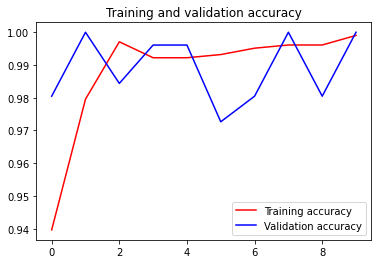

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [12]:
model.load_weights(checkpoint_path)
model.evaluate(validation_generator)

13/13 [==============================] - 32s 2s/step - loss: 0.0733 - accuracy: 0.9805


[0.07325367629528046, 0.98046875]

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)/255

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  if(classes[0]>0.5):
    print(fn + "is a Human")
  else:
    print(fn + "is a Horse")
  #print((classes < 0.5).astype(int))
  #print(fn)
  #print(classes)

Saving valhuman01-00.png to valhuman01-00 (4).png
Saving horse1-000.png to horse1-000 (4).png
Saving human01-00.png to human01-00.png
Saving worried-girl-g4ead99459_1920.jpg to worried-girl-g4ead99459_1920.jpg
Saving white-horse-g5fad11bbe_1920.jpg to white-horse-g5fad11bbe_1920.jpg
Saving horses-ga29da138f_1920.jpg to horses-ga29da138f_1920.jpg
valhuman01-00.pngis a Human
horse1-000.pngis a Horse
human01-00.pngis a Human
worried-girl-g4ead99459_1920.jpgis a Human
white-horse-g5fad11bbe_1920.jpgis a Horse
horses-ga29da138f_1920.jpgis a Horse
